In [9]:
# imports 
import os
import sys
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import linregress
from plotly.subplots import make_subplots
import glob

Current working directory: /Users/pvicovanberkel/PycharmProjects/JBG050_Group_8/app
Contents of 'data' directory: ['PAS_T%26Cdashboard_to%20Q3%2023-24_MPS.csv', 'public-perception-data.csv', '.DS_Store', 'PAS_T%26Cdashboard_to%20Q3%2023-24.xlsx', '9bcd148753d08f98f738fa9e05fc5822a0cb5c8f', 'met_data', 'neighbourhoods_boundary.geojson', 'boundaries_neighbourhoods.json', 'PAS_T%26Cdashboard_to%20Q3%2023-24_Borough.csv', 'london-boroughs_1179.geojson', 'pas_data_ward_level']
Contents of 'pas_data_ward_level' directory: ['PAS_ward_level_FY_17_18.csv', 'PAS_ward_level_FY_19_20.csv', 'PAS_ward_level_FY_15_17.csv', 'PAS_ward_level_FY_18_19.csv', 'PAS_ward_level_FY_20_21.csv']
Looking for files in: ../data/pas_data_ward_level/PAS_ward_level_FY_*.csv
Processing file: ../data/pas_data_ward_level/PAS_ward_level_FY_17_18.csv
Processing file: ../data/pas_data_ward_level/PAS_ward_level_FY_19_20.csv
Processing file: ../data/pas_data_ward_level/PAS_ward_level_FY_15_17.csv
Processing file: ../data/pas_

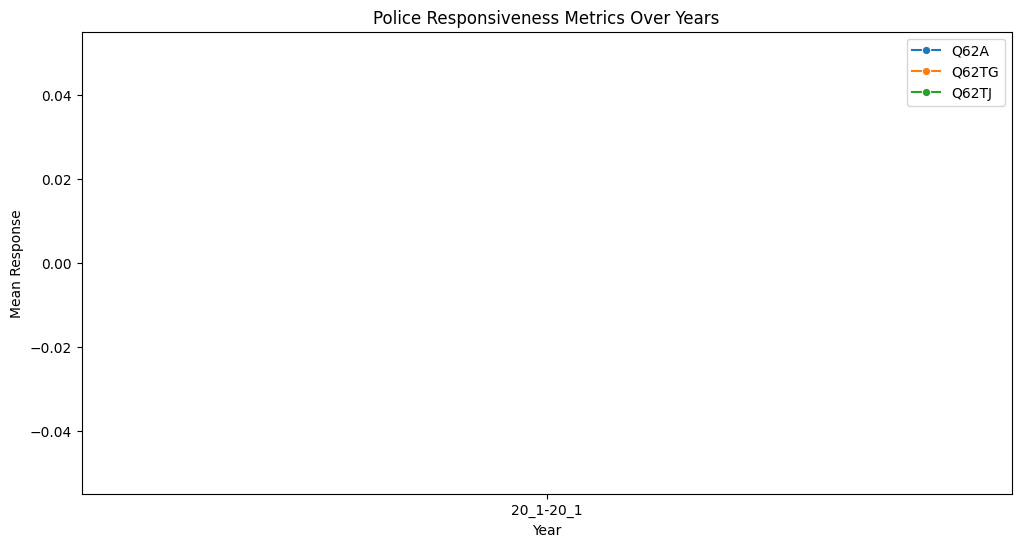

In [3]:
import os
import pandas as pd
import glob

# Debug: Print the current working directory
print(f"Current working directory: {os.getcwd()}")

# Define the path to the 'data' directory
data_dir = os.path.join(os.pardir, 'data')

# Debug: List the contents of the 'data' directory
print(f"Contents of 'data' directory: {os.listdir(data_dir)}")

# Debug: List the contents of the 'pas_data_ward_level' directory
pas_data_dir = os.path.join(data_dir, 'pas_data_ward_level')
print(f"Contents of 'pas_data_ward_level' directory: {os.listdir(pas_data_dir)}")

# Define functions to load and process data
def load_and_aggregate_data(folder_path):
    path_pattern = os.path.join(folder_path, 'PAS_ward_level_FY_*.csv')
    print(f"Looking for files in: {path_pattern}")  # Debug output
    
    files = glob.glob(path_pattern)
    if not files:
        raise FileNotFoundError(f"No files found in {folder_path} matching pattern 'PAS_ward_level_FY_*.csv'")
    
    df_list = []
    for file in files:
        print(f"Processing file: {file}")  # Debug output
        year_data = pd.read_csv(file, low_memory=False)
        # Extract relevant columns and year information
        columns = ['Q62A', 'Q62TG', 'Q62TJ']
        available_columns = [col for col in columns if col in year_data.columns]
        year_data = year_data[available_columns]
        if 'Q62TJ' not in available_columns:
            year_data['Q62TJ'] = pd.NA  # Fill with NaN if Q62TJ is missing
        # Extract year from filename assuming 'PAS_ward_level_FY_XX_YY.csv' format
        year_data['Year'] = f"20{file[-10:-8]}-20{file[-7:-5]}"
        df_list.append(year_data)
    
    if not df_list:
        raise ValueError("No dataframes were created. Please check the files and columns.")
    
    # Combine all dataframes into one
    df_combined = pd.concat(df_list, ignore_index=True)
    # Convert columns to numeric, handling errors
    df_combined[columns] = df_combined[columns].apply(pd.to_numeric, errors='coerce')
    return df_combined

def calculate_metrics(df):
    # Calculate the mean of each column by year
    df_metrics = df.groupby('Year').mean().reset_index()
    return df_metrics

# Load historical PAS data
try:
    df_responsiveness = load_and_aggregate_data(pas_data_dir)
except (FileNotFoundError, ValueError) as e:
    print(e)
else:
    # Calculate metrics
    df_metrics = calculate_metrics(df_responsiveness)

    # Display the data
    print("Aggregated PAS Data:")
    print(df_responsiveness.head())

    print("\nCalculated Metrics by Year:")
    print(df_metrics)

    # Visualize the metrics
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 6))
    for column in ['Q62A', 'Q62TG', 'Q62TJ']:
        sns.lineplot(data=df_metrics, x='Year', y=column, marker='o', label=column)
    plt.title('Police Responsiveness Metrics Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Response')
    plt.legend()
    plt.show()
